## Interpretation

High variance/ overfitting denotes the process that comes along with increasing the model complexity: The more complex the model, the more the model adapts to the train data - since we fit by minimizing the cost function which often equals the MSE. The extreme here denotes a complete interpolation of the data points. In this case the model doesn't recognize the pattern our data follows, since it doesnt abstract enogh. The prediction of the test data differs highly from the observation, the model has a large variance.

In contrast the model could also be underfitted, meaning its not complex enough to be able to give a good representation of the pattern our data follows. This manifests in a high MSE of the train data. 

Too few data points lead to an underfitted model, hence we bootstrap etc. aims to improve our data usage. Overfitting by too many data points is (almost) not possible.


ps: Sorry, still didnt manage to add PDFs to my Jupiter Notebook.

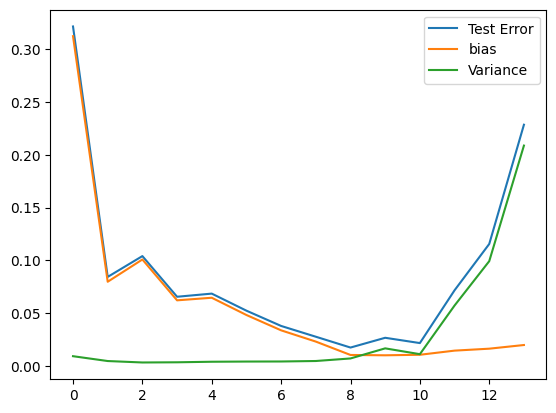

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

def MSE(y_data,y_model):
    n = np.size(y_model)
    y_data = y_data.reshape(-1, 1)
    y_model = y_model.reshape(-1, 1)
    return np.sum((y_data-y_model)**2)/n

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
MSE_test = np.zeros(maxdegree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    y_pred_train = np.empty((y_train.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred_train[:, i] = model.fit(x_, y_).predict(x_train).ravel()
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()
        MSE_train[degree] = MSE_train[degree] + MSE(y_pred_train[:, i], y_train)
        MSE_test[degree] = MSE_test[degree] + MSE(y_pred[:, i], y_test)

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True))

MSE_train = MSE_train/n_boostraps
MSE_test = MSE_test/n_boostraps

# error = MSE test
plt.plot(polydegree, error, label='Test Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
#plt.plot(polydegree, MSE_train, label='Train Error')
plt.legend()
plt.show()
